<h1><center> Medical Health Expenses</h1></center>

* ## Predict the future medical expenses of patients based on certain features.


1. Factors affecting the medical expenses of the patients:-
2. Age
3. Gender
4. Body Mass Index
5. Region
6. Smoking Behaviour

- Shubham Kumar Singh

<center><img src="img.jpg"/></center>

In [2]:
# import the required libraries

# for mathemaical operations
import numpy as np
# for dataframe manipulations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# setting parameters for visualization
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('seaborn-paper')



In [3]:
#data set
data = pd.read_csv('med-insurance.csv')
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
#descriptive summary
data.describe().style.background_gradient(cmap = 'Blues')

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


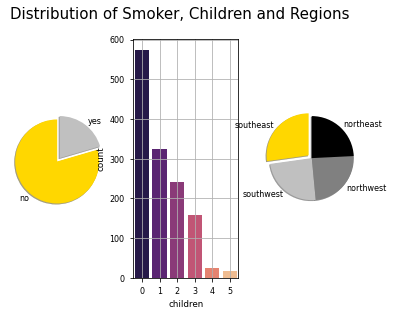

In [7]:
#distribution of smoker, children and region

plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','black'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()

C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

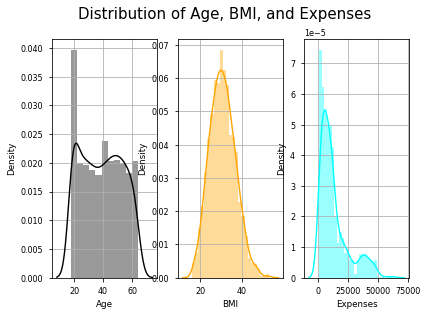

In [8]:
#distribution of age, bmi and expenses

plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

In [9]:
#impact of age on Medical Expenses
fig = px.scatter(data, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols')
fig.show()           

C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\sks4u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



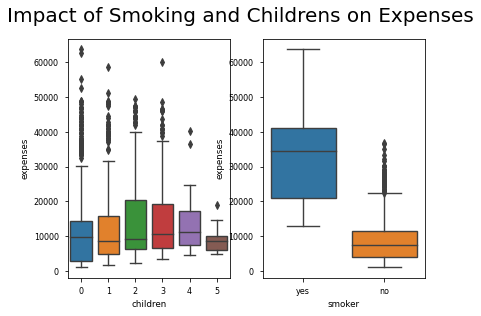

In [10]:
#impact of smoking and childrens in Medical Expenses

plt.subplot(1, 2, 1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 20)
plt.show()

# Multivariate Analysis

In [11]:
#Cap 4 and 5 children since they have simmilar impact on expense above

data['children'] = data['children'].replace((4, 5), (3, 3))

#New count
data['children'].value_counts()

0    574
1    324
2    240
3    200
Name: children, dtype: int64